Plot losses after training (Please specify the STORAGE_DIR where you previously stored the training_metrics_hf.pth file)

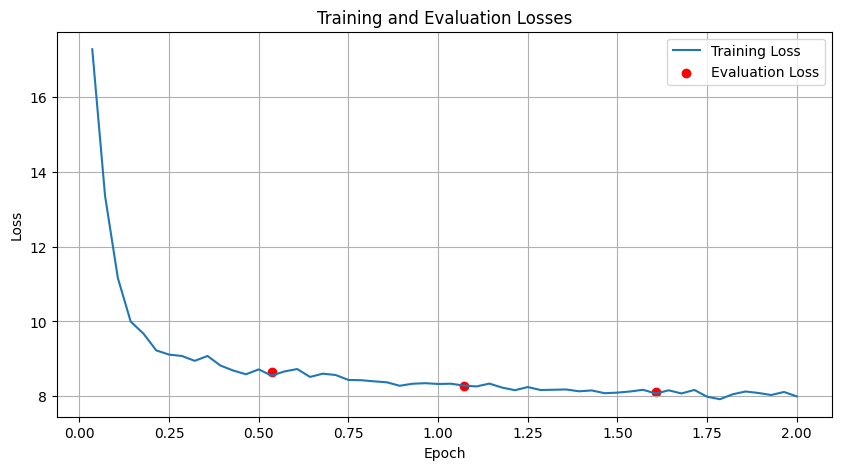

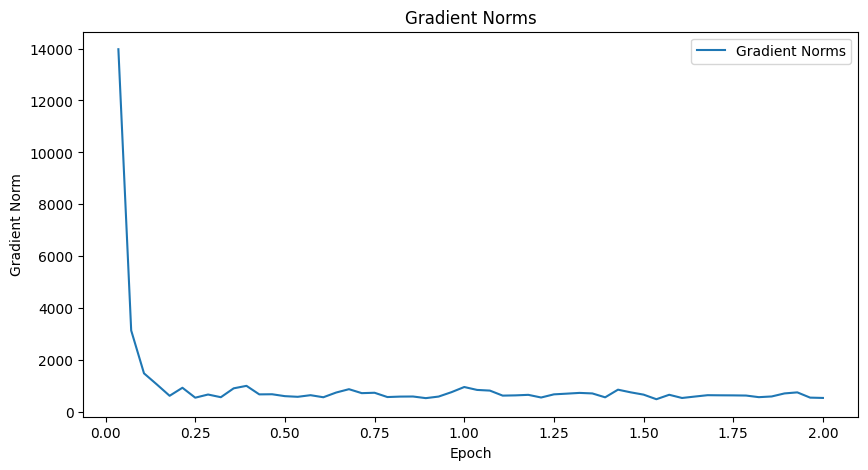

<Figure size 640x480 with 0 Axes>

In [13]:
import torch
import matplotlib.pyplot as plt

import os
STORAGE_DIR = os.getenv("STORAGE_DIR", "/media/discoexterno/leon/qwen-2-vec")      # /media/discoexterno/leon/qwen-2-vec


def plot_training_metrics():

    # Load saved log history from the HF Trainer.
    # This file should contain a list of dictionaries with logged metrics.
    log_history = torch.load(os.path.join(STORAGE_DIR, "training_metrics_hf.pth"))

    gradient_accumulation_steps = 16

    # Initialize lists to store metrics
    train_losses = []
    eval_losses = []
    grad_norms = []
    train_epochs = []
    eval_epochs = []

    # Iterate over each log entry and extract the metrics.
    for entry in log_history:
        # Check if a training loss is logged.
        if "loss" in entry:
            train_losses.append(entry["loss"] / gradient_accumulation_steps)
            train_epochs.append(entry["epoch"])
        # Check if an evaluation loss is logged.
        if "eval_loss" in entry:
            eval_losses.append(entry["eval_loss"])
            eval_epochs.append(entry["epoch"])
        # Check if a gradient norm is logged.
        if "grad_norm" in entry:
            grad_norms.append(entry["grad_norm"])
        
    # Plot training losses and evaluation losses in one plot.
    plt.figure(figsize=(10, 5))
    plt.plot(train_epochs, train_losses, label="Training Loss")
    # plot eval loss with dots scatter
    plt.scatter(eval_epochs, eval_losses, label="Evaluation Loss", color="red")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Losses")
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(STORAGE_DIR, "training_eval_losses.png"))

    # Plot gradient norms in a separate plot.
    plt.figure(figsize=(10, 5))
    plt.plot(train_epochs, grad_norms, label="Gradient Norms")
    plt.xlabel("Epoch")
    plt.ylabel("Gradient Norm")
    plt.title("Gradient Norms")
    plt.legend()
    plt.show()
    plt.savefig(os.path.join(STORAGE_DIR, "grad_norms.png"))


if __name__ == "__main__":
    plot_training_metrics()